<a href="https://colab.research.google.com/github/krithusrinivasan/EDA-Assignments/blob/main/DB_Scan_credit_card_customer_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
data = pd.read_csv('/content/Credit Card Customer Data.csv')

## Summarizing the data

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
data.shape

(660, 7)

In [7]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## Removing Unneccesary Columns

In [11]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [12]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [16]:
df = data.drop(['Sl_No','Customer Key'],axis=1)

In [17]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


## Converting the Dataset in DataFrame Format to Array

In [18]:
df_array = df.values

In [19]:
df_array

array([[100000,      2,      1,      1,      0],
       [ 50000,      3,      0,     10,      9],
       [ 50000,      7,      1,      3,      4],
       ...,
       [145000,      8,      1,      9,      1],
       [172000,     10,      1,     15,      0],
       [167000,      9,      0,     12,      2]])

## Applying Standardization to the Dataset

In [20]:
scale = StandardScaler()

In [21]:
x = scale.fit_transform(df_array)

In [22]:
x

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

## Loading the model

In [24]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [71]:
model = DBSCAN(min_samples=4,eps = 0.7)

In [72]:
model

DBSCAN(eps=0.7, min_samples=4)

## Training the model

In [73]:
model.fit(x)

DBSCAN(eps=0.7, min_samples=4)

## Displaying the labels

In [74]:
model.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [75]:
set(list(model.labels_))

{-1, 0, 1, 2}

In [76]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [77]:
class_

,cluster_values
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
655,-1
656,-1
657,2
658,-1


## Merging the cluster_values to the Entire Dataset

In [78]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [79]:
final_df = pd.concat([df,class_],axis=1)

In [80]:
final_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,100000,2,1,1,0,-1
1,50000,3,0,10,9,-1
2,50000,7,1,3,4,-1
3,30000,5,1,1,4,-1
4,100000,6,0,12,3,-1
...,...,...,...,...,...,...
655,99000,10,1,10,0,-1
656,84000,10,1,13,2,-1
657,145000,8,1,9,1,2
658,172000,10,1,15,0,-1


## Generating Inference

In [81]:
final_df['cluster_values'].unique()

array([-1,  0,  2,  1])

In [82]:
final_df['cluster_values'].value_counts()

cluster_values
 0    603
-1     49
 2      4
 1      4
Name: count, dtype: int64

In [83]:
final_df[final_df['cluster_values']==-1]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,100000,2,1,1,0,-1
1,50000,3,0,10,9,-1
2,50000,7,1,3,4,-1
3,30000,5,1,1,4,-1
4,100000,6,0,12,3,-1
6,100000,5,0,11,2,-1
7,15000,3,0,1,1,-1
8,5000,2,0,2,2,-1
491,63000,4,5,0,0,-1
612,157000,9,1,14,1,-1


In [84]:
final_df[final_df['cluster_values']==0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
5,20000,3,0,1,8,0
9,3000,4,0,1,7,0
10,10000,4,0,5,5,0
11,13000,3,0,2,7,0
12,11000,1,2,5,9,0
...,...,...,...,...,...,...
607,34000,6,3,1,0,0
608,47000,4,4,1,0,0
609,38000,4,3,2,0,0
610,39000,7,2,1,0,0


In [86]:
final_df[final_df['cluster_values']==1]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
635,114000,10,1,7,2,1
636,126000,10,1,8,0,1
642,97000,10,1,9,2,1
649,112000,10,1,8,1,1


In [87]:
final_df[final_df['cluster_values']==2]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
614,163000,8,1,7,1,2
638,153000,8,1,7,1,2
652,156000,8,1,8,0,2
657,145000,8,1,9,1,2


## Visualizing the Result

In [88]:
final_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,100000,2,1,1,0,-1
1,50000,3,0,10,9,-1
2,50000,7,1,3,4,-1
3,30000,5,1,1,4,-1
4,100000,6,0,12,3,-1
...,...,...,...,...,...,...
655,99000,10,1,10,0,-1
656,84000,10,1,13,2,-1
657,145000,8,1,9,1,2
658,172000,10,1,15,0,-1


In [89]:
input_x = final_df.iloc[:,:-1].values

In [90]:
input_x

array([[100000,      2,      1,      1,      0],
       [ 50000,      3,      0,     10,      9],
       [ 50000,      7,      1,      3,      4],
       ...,
       [145000,      8,      1,      9,      1],
       [172000,     10,      1,     15,      0],
       [167000,      9,      0,     12,      2]])

In [91]:
output_y = final_df.iloc[:,-1].values

In [92]:
output_y

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

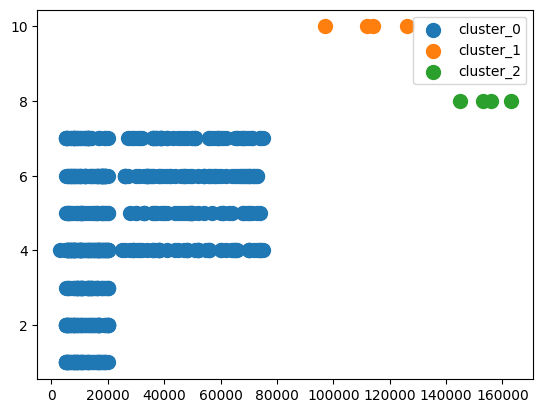

In [95]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.legend()
plt.show()

There are three clusters and we have got a considerable no.of outliers so this model can be used For this dataset.